# Comparando os resultados dos algoritmos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_svm = pd.read_csv('https://drive.google.com/uc?id=18sW3cS6mq0fb2e64ZVwABQrzfMCkUFIA')
df_svm.head()

,C,kernel,gamma,accuracy,recall,precision,f1,roc_auc
0,0.1,linear,0.1,0.514440,0.514482,0.520721,0.513511,0.781825
1,0.1,linear,1.0,0.514440,0.514482,0.520721,0.513511,0.781820
2,0.1,linear,5.0,0.514440,0.514482,0.520721,0.513511,0.781833
3,0.1,linear,10.0,0.514440,0.514482,0.520721,0.513511,0.781841
4,0.1,rbf,0.1,0.479359,0.479727,0.499816,0.469163,0.770851


In [ ]:
df_lqv = pd.read_csv('https://drive.google.com/uc?id=1ON0oLFAHIrXV5PikJ8XPWK5liyXi4wKl')
df_lqv.head()

,Unnamed: 0,distance_type,activation_type,activation_params,solver_type,solver_params,accuracy,recall,precision,f1,roc_auc
0,0,squared-euclidean,identity,NaN,steepest-gradient-descent,"{'max_runs': 20, 'step_size': 0.1}",0.473422,0.471373,0.488044,0.420815,0.756635
1,1,squared-euclidean,identity,NaN,steepest-gradient-descent,"{'max_runs': 50, 'step_size': 0.01}",0.488929,0.490102,0.492977,0.424013,0.745686
2,2,squared-euclidean,identity,NaN,adam,"{'max_runs': 20, 'step_size': 0.1}",0.410263,0.409729,0.467666,0.333307,0.742270
3,3,squared-euclidean,identity,NaN,adam,"{'max_runs': 50, 'step_size': 0.01}",0.473508,0.472164,0.489238,0.420775,0.750368
4,4,squared-euclidean,identity,NaN,steepest-gradient-descent,"{'max_runs': 20, 'step_size': 0.1}",0.447817,0.446514,0.467268,0.384336,0.759377


In [ ]:
df_mlp = pd.read_csv('https://drive.google.com/uc?id=1Vnps7RpbT-rOt4aTcfd2FBlZdxo_xEhx')
df_mlp.head()

,hidden_layer_sizes,activation,solver,alpha,learning_rate,accuracy,recall,precision,f1,roc_auc
0,"(100,)",relu,adam,0.100,constant,0.637136,0.637229,0.633195,0.632122,0.868892
1,"(100,)",relu,adam,0.100,adaptive,0.635631,0.636053,0.632889,0.630785,0.868208
2,"(100,)",relu,adam,0.010,constant,0.700477,0.700444,0.696699,0.694873,0.897495
3,"(100,)",relu,adam,0.010,adaptive,0.694276,0.694612,0.690816,0.688552,0.895130
4,"(100,)",relu,adam,0.005,constant,0.702779,0.702993,0.698070,0.696232,0.898589


In [ ]:
df_dt = pd.read_csv('https://drive.google.com/uc?id=1c97i8CUwc2gHxhIq4THpDzOZ7RWbrfxY')
df_dt.head()

,Unnamed: 0,max_depth,min_samples_split,min_samples_leaf,criterion,accuracy,recall,precision,f1,roc_auc
0,0,3,2,1,gini,0.499912,0.502772,0.502775,0.477906,0.767697
1,1,3,2,1,entropy,0.494772,0.494913,0.471781,0.456544,0.764828
2,2,3,2,2,gini,0.499912,0.502772,0.502775,0.477906,0.767697
3,3,3,2,2,entropy,0.494772,0.494913,0.471781,0.456544,0.764828
4,4,3,2,5,gini,0.499912,0.502772,0.502775,0.477906,0.767697


In [ ]:
df_knn = pd.read_csv('https://drive.google.com/uc?id=1tQBAwOhbzN9NSBgmeyFUVjl2H1FT4gL1')
df_knn.head()

,Unnamed: 0,n_neighbors,metric,accuracy,recall,precision,f1,roc_auc
0,0,5,euclidean,0.853827,0.853791,0.859566,0.844613,0.963464
1,1,5,manhattan,0.866937,0.866822,0.873836,0.858108,0.968157
2,2,6,euclidean,0.844347,0.844334,0.849316,0.834311,0.963582
3,3,6,manhattan,0.857370,0.857311,0.863856,0.847486,0.968200
4,4,7,euclidean,0.834779,0.834739,0.841985,0.823160,0.962934


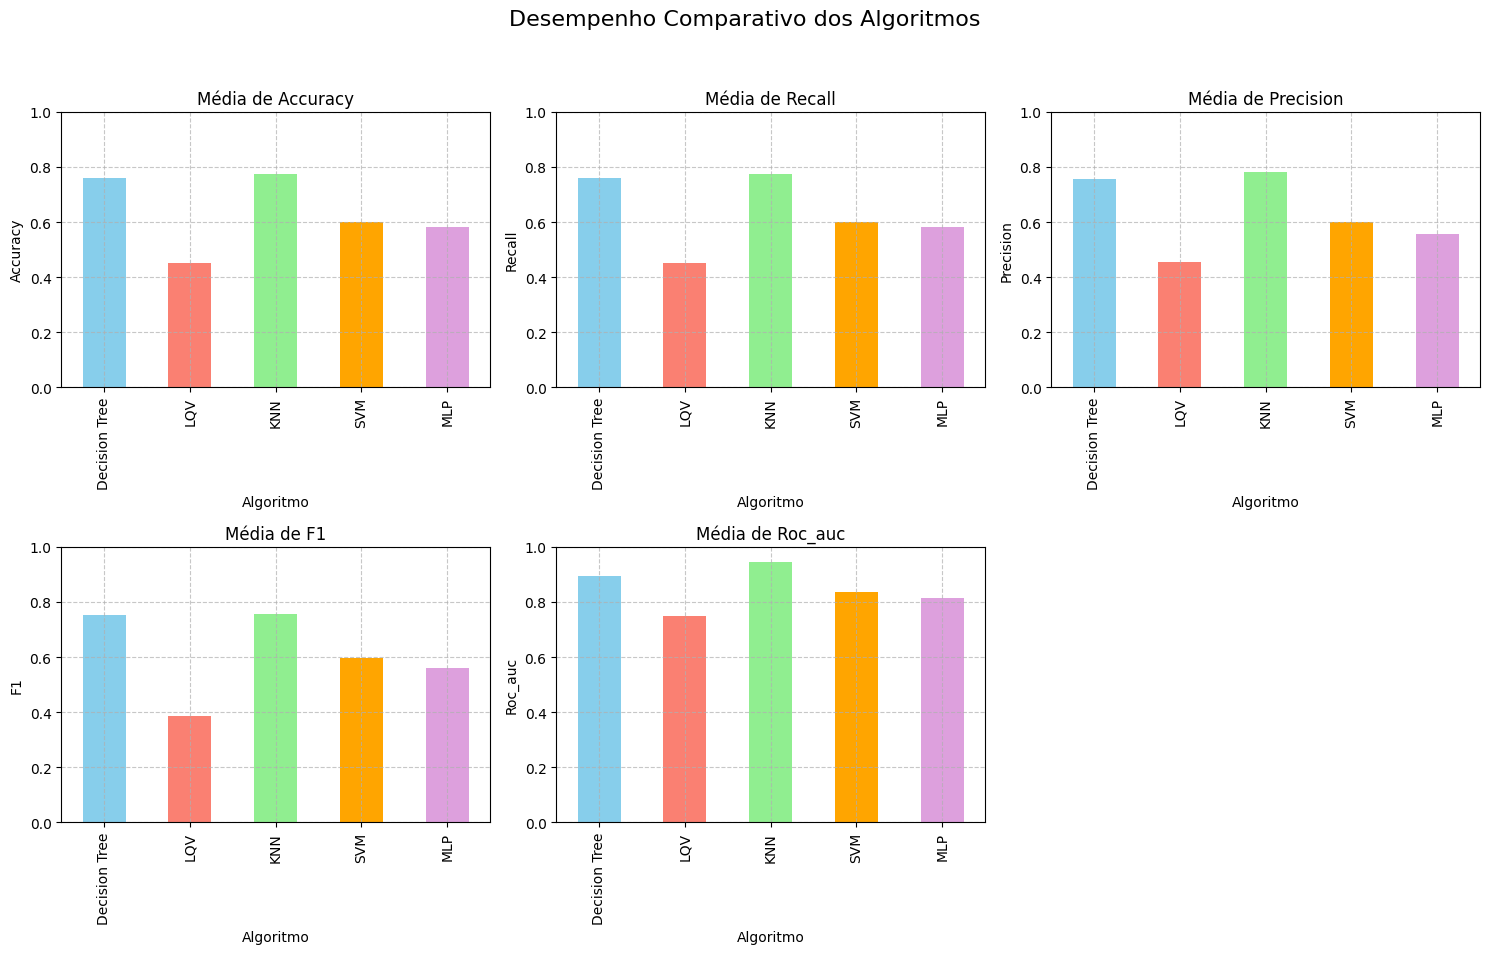

In [ ]:
metrics_means = {
    "Decision Tree": df_dt[['accuracy', 'recall', 'precision', 'f1', 'roc_auc']].mean(),
    "LQV": df_lqv[['accuracy', 'recall', 'precision', 'f1', 'roc_auc']].mean(),
    "KNN": df_knn[['accuracy', 'recall', 'precision', 'f1', 'roc_auc']].mean(),
    "SVM": df_svm[['accuracy', 'recall', 'precision', 'f1', 'roc_auc']].mean(),
    "MLP": df_mlp[['accuracy', 'recall', 'precision', 'f1', 'roc_auc']].mean()
}

metrics_df = pd.DataFrame(metrics_means).T
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Desempenho Comparativo dos Algoritmos', fontsize=16)

metrics = ['accuracy', 'recall', 'precision', 'f1', 'roc_auc']

for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]
    metrics_df[metric].plot(kind='bar', ax=ax, color=['skyblue', 'salmon', 'lightgreen', 'orange', 'plum'])
    ax.set_title(f'Média de {metric.capitalize()}')
    ax.set_xlabel('Algoritmo')
    ax.set_ylabel(metric.capitalize())
    ax.set_ylim(0, 1)
    ax.grid(True, linestyle='--', alpha=0.7)

axes[1, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
